<a href="https://colab.research.google.com/github/kholl28/dacss603/blob/main/DACSS_603_Tutorial_3_CentralLimitTheorem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Introduction**
  
In this week's tutorial, you will learn about the Central Limit Theorem using functions in R. The Central Limit Theorem states that when the sample size is sufficiently large, a sampling distribution of the mean of a random variable will be approximately normally distributed. In most cases, a sample size of 30 or above is considered "sufficiently large" for the rule to apply.

The Central Limit Theorem is important to us because it allows us to make confident estimates of a population mean, no matter the shape of the population distribution. In addition, the sampling distribution will center about the population mean.

## **`Sampling`**

Draw 1000 numbers at random from a normal distribution having mean 100 and standard deviation 10. Plot the histogram corresponding to this sample. Use the following R code:

In [ ]:
x <- rnorm(1000, mean = 100, sd = 10)
hist(x, prob= TRUE, xlim = c(70, 130))
curve(dnorm(x, mean = 100, sd = 10), add= TRUE,lwd= 2,col= "blue")

Is the histogram normal in shape? Use the code chunk below to see if the sample mean and standard deviation conforms to the population from which they are drawn:




In [ ]:
mean(x)
sd(x)

The population mean was 100 and the standard deviation 10. Are the sample mean and standard deviation approximately equal to that?

Now, let's draw 1000 samples of size 5 from the same distribution and get the mean of each sample.

In [ ]:
size <- 5
n_samples <- 1000

sample_means <- replicate(n_samples,
  expr = {
  mean(rnorm(size, mean = 100, sd = 10))
  }
)


hist(sample_means, prob= TRUE, xlim = c(70, 130))
curve(dnorm(x, mean = 100, sd = 10), add= TRUE,lwd= 2,col= "blue")



Does the last histogram conform with expectations from the central limit theorem? Is the standard deviation of the sample means (called standard error) smaller or larger than the population mean?

The central limit theorem tells us that the standard error is $\frac{\sigma}{\sqrt{n}}$, where $\sigma$ is the population standard deviation and $n$ is the sample size. Our population standard deviation was 10 and sample size is 5. Calculate what the standard error in the code chunk below: (use the sqrt() function):

In [ ]:
se <- 10 / sqrt(5)
print(se)

The sample means are stored in the `sample_means` vector. Calculate the standard deviation to see if the observed standard deviation is close to the standard error estimate from the Central Limit Theorem:

In [ ]:
sd(sample_means)

In a a normal distribution, 95% of all observations are within 1.96 standard deviations of the mean. Or, to be more precise:

In [ ]:
qnorm(0.975)

Because our sample means are normally distributed, 95% of them should be within 1.96 standard deviations, which is the standard error. Let's see if that's the case:

In [ ]:
upper <- 100 + qnorm(0.975) * se
lower <- 100 - qnorm(0.975) * se # another way of writing this would be as follows # lower <- 100 + qnorm(0.025) * se


n_outside <- length(which(sample_means > upper | sample_means < lower)) # number of observations outside of the lower and upper bound
n_outside / n_samples


Notice, because the original distribution is normal, the central limit theorem kicks in immediately (the sampling distribution is normal even for small sample sizes like 5). However, when the original distribution is non-normal, a rule of thumb is that 30 observations are needed for the sampling distribution to start looking normal.

Your turn: Change the sample size to 20, draw 1000 samples from the same distribution (mean 100 and sd 10). How does the sampling distribution of the sample mean change? What is the standard error now? Is the observed standard error close enough?

In [ ]:
# Write your code here



## **`Sample of Sample Means`**

### **`Uniform Distribution`**

Now, let’s produce a sample of sample means after repeated sampling of 100 numbers from the Uniform distribution with mean = 0, and standard deviation = 1. We will find the mean of these 100 numbers in our sample and append the mean to a variable x_bar (which is a vector) after repeating this experiment 500 times. Lastly, we will plot the histogram of sample means. Run the following R chunk. Is the histogram normal in shape? What is the center of the histogram of sample means?

In [ ]:
n_experiment <- 500
sample_size <- 100

x_bar <- replicate(n_experiment,
  expr = {
  mean(runif(sample_size))
  }
)

hist(x_bar)

What is the “mean of sample means”?

In [ ]:
mean(x_bar)

What do you observe about the shape of the histogram when the sample size is 1, 3, 10, 30? In particular, does the rule of thumb mentioned above seem plausible to you?

In [ ]:
# Write your code here



### **`Poisson Distribution`**

Now, let’s produce a sample of sample means after repeated sampling of 100 numbers from the Poisson distribution with lambda = 7. We will find the mean of these 100 numbers in our sample and append the mean to a variable x_bar (which is a vector) after repeating this experiment 500 times. Lastly, we will plot the histogram of sample means. Run the following R chunk. Is the histogram normal in shape? What is the center of the histogram of sample means?

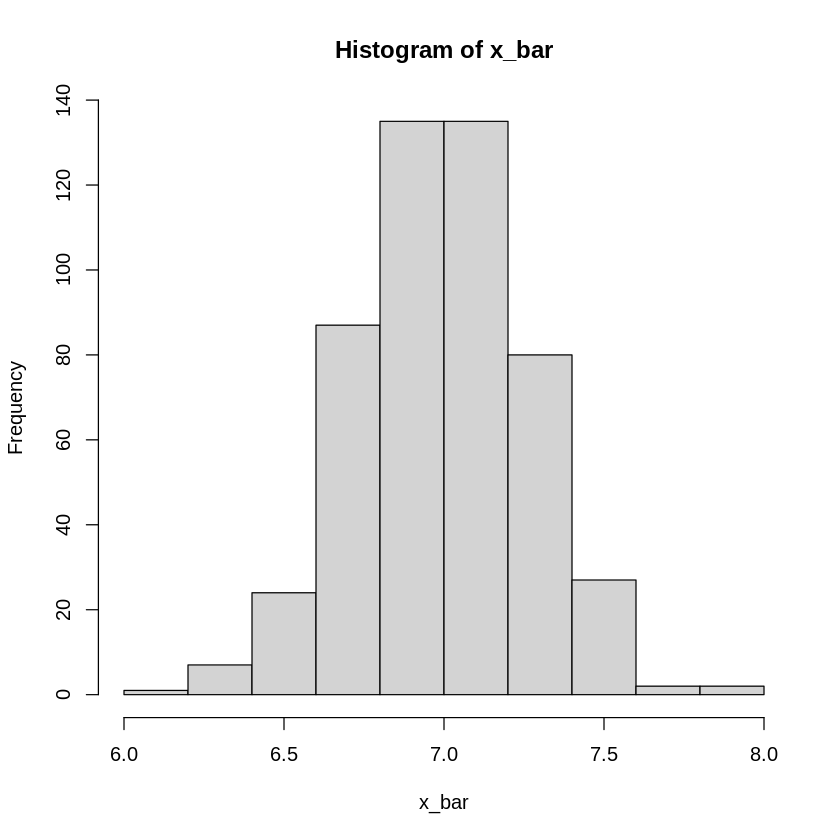

In [ ]:
n_experiment <- 500
sample_size <- 100
lambda <- 7


x_bar <- replicate(n_experiment,
  expr = {
  mean(rpois(sample_size, lambda))
  }
)

hist(x_bar)

What is the “mean of sample means”?

In [ ]:
# Write your code here

mean(x_bar)

What do you observe about the shape of the histogram when the sample size is 1, 3, 10, 30?

In [ ]:
# Write your code here



In the Poisson distribution, lambda is both the mean and the **variance**. By specifying lambda, we know the population variance and thus standard deviation (which is the **square root of variance**). Because we know the sample size, we can also calculate the standard error.

Below, 1) calculate what the standard error of the sample mean should be for samples drawn from a Poisson distribution with a lambda of 7 and sample size of 30. 2) draw 1000 samples of size 30 from a Poisson distribution with lambda of 7, calculate its standard deviation. Are the two quantities similar?

In [ ]:
# Write your code here


